Import libraries and packages and load change detection dataset

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import models.gcd_vi_models as gcd_vi_models
import utils.gcd_utils as gcd_utils
from skimage.filters import threshold_multiotsu

base_dir = os.getcwd()
datasets_dir = os.path.join(base_dir,'datasets')
datasets_dir = os.path.join(datasets_dir ,'cd')

# Load dataset
#dataset_name = 'Atlantico'
dataset_name = 'California'
dataset = gcd_utils.dataset_loader(datasets_dir,dataset_name)

print('pre-event image size {shape}'.format(shape=dataset['before'].shape))
print('post-event image size {shape}'.format(shape=dataset['after'].shape))
print(dataset['metadata'])

pre-event image size (3500, 2000, 11)
post-event image size (3500, 2000, 3)
{'name': 'California'}


Implement preprocessing pipeline and graph structure learning from average signals,
extracted from pre and post event images.

In [2]:
num_spixels = 2400
r = 2
prepro_params = {'sp_method': 'slic',
                 'iqr_clipping':False} # controls 

# Segments image space into superpixels (or segments), and 
# extract average and feature signals from pre and post event images at the superpixels.
X_mean, X, F, segments = gcd_utils.prepro_pipeline(dataset,num_spixels,r,prepro_params)

# Infer graph G from avg. signals using Kalofolia's graph structure learning model 
n = X_mean[0].shape[0] # number of nodes

gl_params = {'model': 'Kalofolias', # or 'Gaussian'
                'k': int(np.sqrt(n)),
                'knn_edge_cons': True,
                'k_': 5*int(np.sqrt(n)),
                'fusion_rule': 'sum', 
                'tol': 1e-5 # stopping tolerance
                }
W, outparams = gcd_utils.construct_adj_matrix(X_mean, gl_params)

Relative change of primal, dual variables, and objective fun

iter 0 : inf inf [46949.71004615]
iter 1 : 0.5719381122171899 0.6853318180008883 [4445.42571473]
iter 2 : 0.530969184607377 0.23560238847775325 [2185.24629099]
iter 3 : 0.442314063967651 0.13397124494732018 [1724.46374577]
iter 4 : 0.3209728152668899 0.08964469594997598 [1235.66436633]
iter 5 : 0.23240093638910642 0.06866354427007593 [845.21372134]
iter 6 : 0.17385133090444427 0.05685840471628617 [514.59176529]


c:\Users\juanf\OneDrive\Documents\GitHub\temp\Exploiting-variational-inequalities-for-generalized-change-detection-on-graphs\learngraph\src\prox.py:120: RuntimeWarning: divide by zero encountered in log
  'final_eval': -gamma * np.sum(np.log(utils.reshape_as_column(x)),axis = 0),
c:\Users\juanf\OneDrive\Documents\GitHub\temp\Exploiting-variational-inequalities-for-generalized-change-detection-on-graphs\learngraph\src\gl_models.py:341: RuntimeWarning: divide by zero encountered in scalar divide
  rel_norm_primal = np.linalg.norm(-Y_n + Q_n,'fro')/np.linalg.norm(w,'fro')
c:\Users\juanf\OneDrive\Documents\GitHub\temp\Exploiting-variational-inequalities-for-generalized-change-detection-on-graphs\learngraph\src\gl_models.py:342: RuntimeWarning: divide by zero encountered in scalar divide
  rel_norm_dual = np.linalg.norm(- y_n + q_n,2)/np.linalg.norm(v_n,2)
c:\Users\juanf\OneDrive\Documents\GitHub\temp\Exploiting-variational-inequalities-for-generalized-change-detection-on-graphs\learngraph\

iter 7 : 0.13496998255675935 0.04873084010983361 [246.53398425]
iter 8 : 0.10834944261622098 0.0423325863439442 [29.14009484]
iter 9 : 0.08941608934081244 0.037023741665607214 [-146.35727162]
iter 10 : 0.07540170809602798 0.03262207868587204 [-288.57379906]
iter 11 : 0.06459592730971411 0.029047268033466203 [-404.31637671]
iter 12 : 0.0559649812692686 0.026184470047323282 [-498.83014537]
iter 13 : 0.04890358508402643 0.02389481430117545 [-576.08048614]
iter 14 : 0.042972765497843055 0.022069262541696513 [-639.06124279]
iter 15 : 0.03794109587380043 0.02059920443743455 [-690.03413916]
iter 16 : 0.03363324351138136 0.019384620339862234 [-730.87712121]
iter 17 : 0.029935264540928572 0.018335345359371813 [-763.11313138]
iter 18 : 0.026751596543355016 0.017377391198101742 [-788.04336704]
iter 19 : 0.023995028225503458 0.0164629844510062 [-806.76428936]
iter 20 : 0.021620678482973565 0.015557336770238813 [-820.20279461]
iter 21 : 0.019567655957935835 0.014648973754025118 [-829.27555204]
iter

Generate training set for semisupervised cd scheme, estimate probability and change maps using proposed model, and visualize results.

iter: 0 1.1913052888204319 0.1422493636273054
iter: 300 0.08425429397349944 8.927383923845838
iter: 600 0.04205327005323389 10.83337585951473
iter: 900 0.027928668265106964 11.941875971892994
iter: 1200 0.02088591625248202 12.725068854164975
iter: 1500 0.016672583146964813 13.330782884990553
iter: 1800 0.013870675711656342 13.824626069014938
iter: 2100 0.011873447958181474 14.241479320361059
iter: 2400 0.010378111662072972 14.60210486768433
iter: 2700 0.009216767164918536 14.91986310970775
iter: 3000 0.008288848901500155 15.203858157525755
iter: 3300 0.007530460664920069 15.460572460428779
iter: 3600 0.006899064906908271 15.694785308146766
iter: 3900 0.006365249844937707 15.910121430816107
iter: 4200 0.026574837461152155 12.022605787925773
iter: 4500 0.02657840332072053 12.022605787925771
iter: 4800 0.026581874144589727 12.022605787925773
iter: 5100 0.026584183478504587 12.022605787925773
iter: 5400 0.026585587522533517 12.022605787925773
iter: 5700 0.026586383708289998 12.022605787925

c:\Users\juanf\OneDrive\Documents\GitHub\temp\Exploiting-variational-inequalities-for-generalized-change-detection-on-graphs\utils\gcd_utils.py:884: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches = [ mpatches.Patch(color=color_encoding_map[i], label=i, edgecolor='black') for i in ['TP','FP','FN','TN'] ]


metrics: kappa: 0.5085871990598416 tpr: 0.49526522 precision: 0.5667862


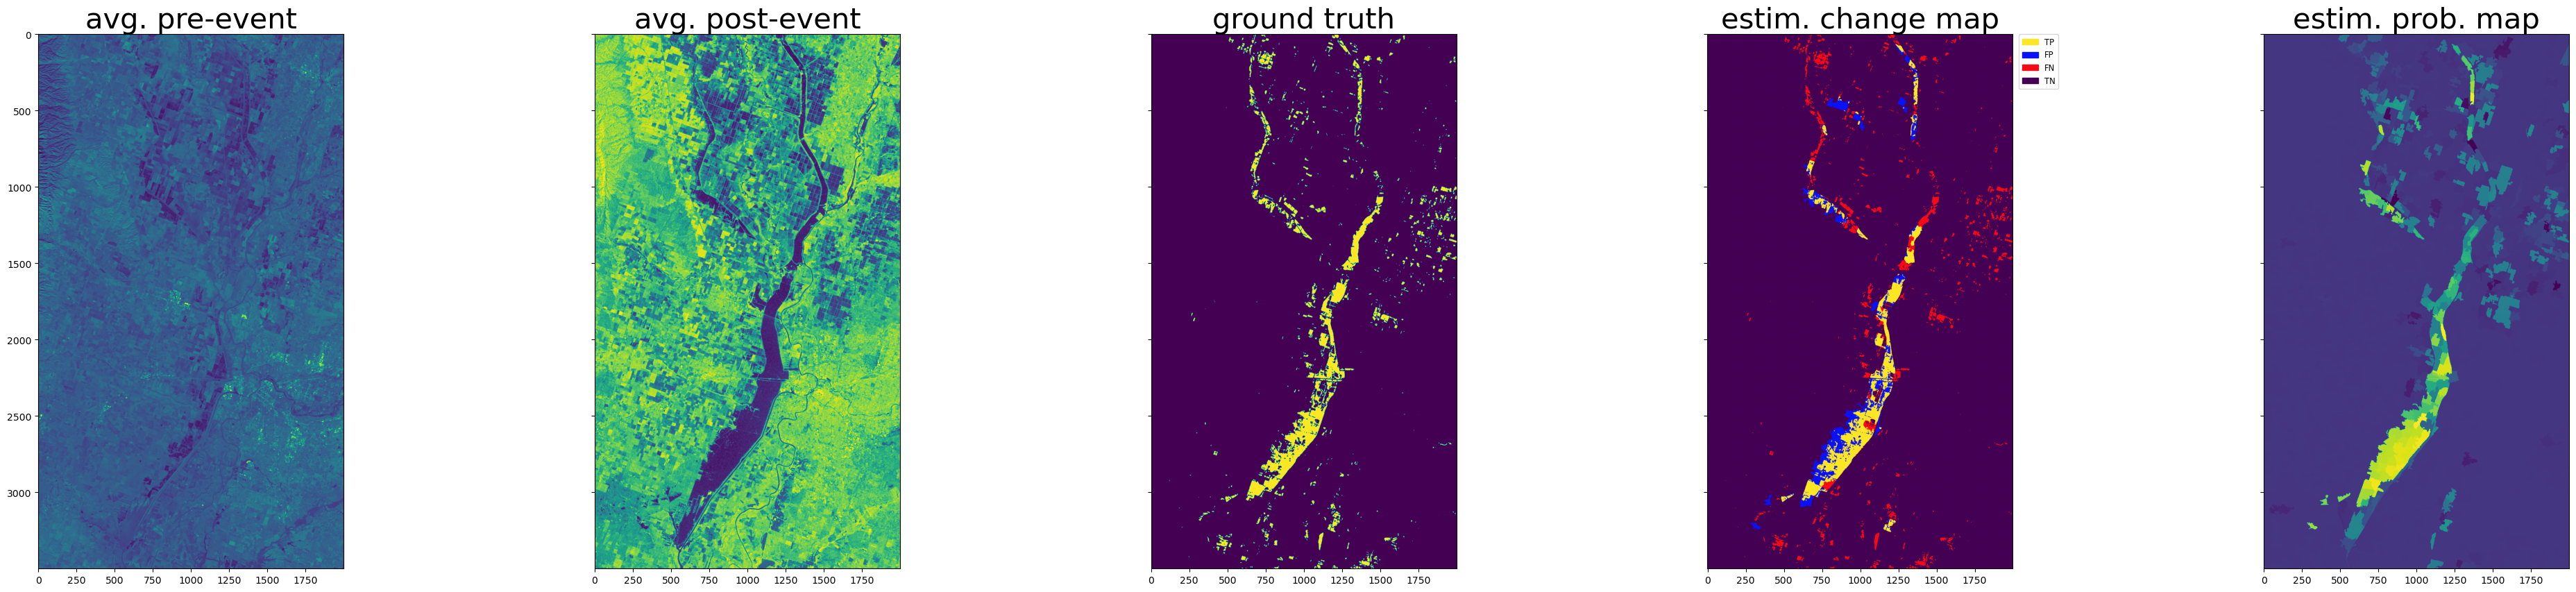

In [3]:
f = F[:,0] # undersampled ground truth labels
n_pos = np.sum(f)
n_neg = np.sum(1-f)

sampling_params = {'type': 'stratified_random_sampling', 
                    'seed' : 1916, 
                    'labels': f}
m = np.max([1,int(n_pos/16)])
y_train, idx_train = gcd_utils.generate_train_dataset(m,n,sampling_params)


norm = '2'
w0 = np.zeros((n,1))
epsilon = 1e6
alg_param = {'basis_params':('RLP',n),
             #'feature_matrix': np.hstack(X),
             'C_params':(norm, w0, epsilon),
             'maxit':n,
             'gamma0':1
             }

alg_param['display_iter'] = True # when false, it does not display progress
alg_param['disp_factor'] = 300 # display algorithm progress every other 300 iter

f_hat, probs_hat = gcd_vi_models.semisup_cd_estimation(y_train,idx_train,W,alg_param)

change_map = gcd_utils.spixels_upsampling(f_hat,segments)
prob_map = gcd_utils.spixels_upsampling(probs_hat,segments)

kappa, tpr, precision, conf_img_dict = gcd_utils.kappa_coeff(dataset['gt'].flatten(),change_map.flatten())

fig, ax = plt.subplots(1,5,figsize=(50,10),sharey=True)

title_list = ['avg. pre-event', 'avg. post-event', 'ground truth', 'estim. change map', 'estim. prob. map']
ax[0].imshow(np.mean(dataset['before'],axis=2) if dataset['before'].ndim > 2 else dataset['before'])
ax[1].imshow(np.mean(dataset['after'],axis=2) if dataset['after'].ndim > 2 else dataset['after'])
ax[2].imshow(dataset['gt'])
#ax[3].imshow(change_map)
n1,n2 = segments.shape
gcd_utils.plot_confusion_img_on_ax(conf_img_dict,n1,n2,ax[3],add_legend=True,default_loc = True)
ax[4].imshow(prob_map)

for title_idx in range(len(title_list)):
    ax[title_idx].set_title(title_list[title_idx],fontsize=30)

print('metrics: kappa:', kappa, 'tpr:', tpr, 'precision:', precision)


We now evaluate the unsupervised approach, in addition to G with adj. matrix W, we need an additional graph G1 on which preevent signals are sufficiently smooth. To that end, we construct G1 from avg pre-event signals using a Gaussian kernel.

In [4]:
reverse_flag = False

if reverse_flag:
    swap_order = lambda x: (x[1],x[0])
    X_mean = swap_order(X_mean)
    X = swap_order(X)

gl_params = {'model': 'Gaussian',
                'k': int(np.sqrt(n))
                }
W1, outparams = gcd_utils.construct_adj_matrix(X_mean[0], gl_params)

iter: 0 phi_1: [3.25617591] phi_2: [0.]
iter: 300 phi_1: [1.48491885] phi_2: [0.00269707]
iter: 600 phi_1: [1.2131143] phi_2: [0.01016333]
iter: 900 phi_1: [1.01354757] phi_2: [0.01609894]
iter: 1200 phi_1: [0.86203892] phi_2: [0.0213425]
iter: 1500 phi_1: [0.7444787] phi_2: [0.02593489]
iter: 1800 phi_1: [0.65210807] phi_2: [0.02997392]
iter: 2100 phi_1: [0.57910834] phi_2: [0.03350359]
iter: 2400 phi_1: [0.52134813] phi_2: [0.03654635]
iter: 2700 phi_1: [0.47572396] phi_2: [0.03912929]
iter: 3000 phi_1: [0.43980363] phi_2: [0.04128996]
iter: 3300 phi_1: [0.4116272] phi_2: [0.0430735]
iter: 3600 phi_1: [0.38959254] phi_2: [0.04452786]
iter: 3900 phi_1: [0.37238674] phi_2: [0.0456999]
iter: 4200 phi_1: [0.45495544] phi_2: [0.11068374]
iter: 4500 phi_1: [0.43399877] phi_2: [0.10019112]
iter: 4800 phi_1: [0.41729323] phi_2: [0.09575024]
iter: 5100 phi_1: [0.4048845] phi_2: [0.09327331]
iter: 5400 phi_1: [0.39555374] phi_2: [0.09174007]
iter: 5700 phi_1: [0.38837426] phi_2: [0.09072939]
i

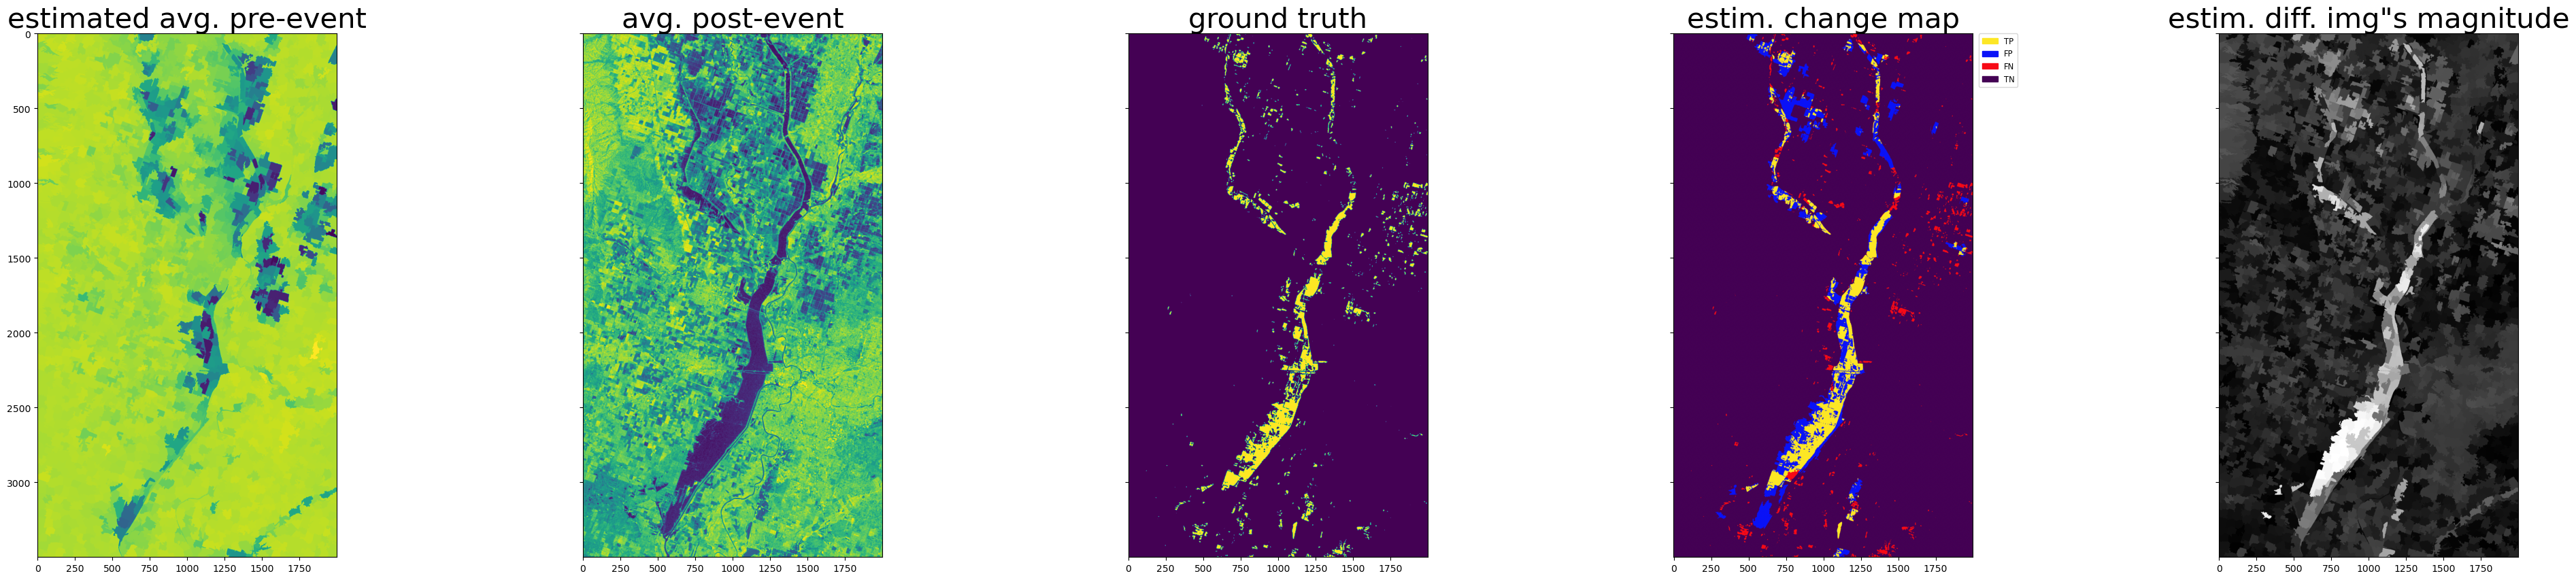

In [5]:
alg_param = {'basis_params':('RLP',n),
             'feature_matrix': X_mean[0],#p.hstack(X),
             'C_params':(norm, w0, epsilon),
             'maxit': n,
             'gamma0':1,
             'reversed': reverse_flag # post event assume the superposition of a pre event signal and a difference signal
             }

alg_param['display_iter'] = True # when false, it does not display progress
alg_param['disp_factor'] = 300 # display algorithm progress every other 300 iter


x1_hat, delta, history = gcd_vi_models.unsupervised_cd_estimation(X_mean[1],W1,W,alg_param)
delta_mag = np.sqrt(np.sum((delta)**2,axis=1)).reshape((n,1))    

avg_pre_event_img = gcd_utils.spixels_upsampling(np.mean(x1_hat,axis=1), segments)
diff_img_mag = gcd_utils.spixels_upsampling(delta_mag, segments)
thresholds_v01 = threshold_multiotsu(diff_img_mag,classes=2)
change_map = np.digitize(diff_img_mag, bins=thresholds_v01)

kappa, tpr, precision, conf_img_dict = gcd_utils.kappa_coeff(dataset['gt'].flatten(),change_map.flatten())

fig, ax = plt.subplots(1,5,figsize=(50,10),sharey=True)

title_list = ['estimated avg. pre-event', 'avg. post-event', 'ground truth', 'estim. change map', 'estim. diff. img"s magnitude']
ax[0].imshow(avg_pre_event_img)
ax[1].imshow(np.mean(dataset['after'],axis=2) if dataset['after'].ndim > 2 else dataset['after'])
ax[2].imshow(dataset['gt'])
#ax[3].imshow(change_map)
n1,n2 = segments.shape
gcd_utils.plot_confusion_img_on_ax(conf_img_dict,n1,n2,ax[3],add_legend=True,default_loc = True)
ax[4].imshow(diff_img_mag, cmap='gray')

for title_idx in range(len(title_list)):
    ax[title_idx].set_title(title_list[title_idx],fontsize=30)

print('metrics: kappa:', kappa, 'tpr:', tpr, 'precision:', precision)



#ax[2].plot(history['norm_w'])

Text(0.5, 0, 'iterations $i$')

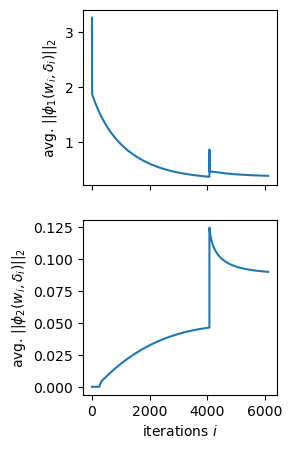

In [6]:
fig, ax = plt.subplots(2,1,figsize=(2.5,5),sharex=True)

ax[0].plot(history['phi_1'])
ax[0].set_ylabel('avg. $||\phi_1(w_i,\delta_i)||_2$')
ax[1].plot(history['phi_2'])
ax[1].set_ylabel('avg. $||\phi_2(w_i,\delta_i)||_2$')
ax[1].set_xlabel('iterations $i$')